### **Importing Modules**

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package stopwords to C:\Users\David-
[nltk_data]     Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\David-
[nltk_data]     Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Reading Data**

In [2]:
data = pd.read_csv("data/SPAM text message 20170820 - Data.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Encoding the category column in data**

In [12]:
encoder = LabelEncoder()
data.Category = encoder.fit_transform(data.Category)
data.head()
# print(stopwords.words('english'))


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


ham - 0 <br>
spam - 1

In [15]:
wordnet = WordNetLemmatizer()
corpus = []

for i in range(0, len(data)):
    regex = re.sub(r'https?://\S+|www.\S+', '', data['Message'][i])
    regex = re.sub(r'<.*?>', '', regex)
    regex = re.sub(r'[^a-zA-Z]+', ' ', regex)
    regex = re.sub(r'[0-9]', '', regex)
    regex = regex.lower()
    regex = regex.split()
    regex = [str(wordnet.lemmatize(word)) for word in regex if word not in stopwords.words('english')]
    regex = " ".join(regex)
    corpus.append(regex)


In [17]:
y = data.Category
X = pd.DataFrame(corpus, columns=['text'])

In [18]:
X

,text
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah think go usf life around though
...,...
5567,nd time tried contact u u pound prize claim ea...
5568,b going esplanade fr home
5569,pity mood suggestion
5570,guy bitching acted like interested buying some...


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
vectorizer = CountVectorizer(max_features=3000)
train_X = vectorizer.fit_transform(X_train['text']).toarray()
test_X = vectorizer.transform(X_test['text']).toarray()

In [25]:
train_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
nb = MultinomialNB()
nb.fit(train_X, y_train)
y_pred_nb = nb.predict(test_X)

<AxesSubplot:>

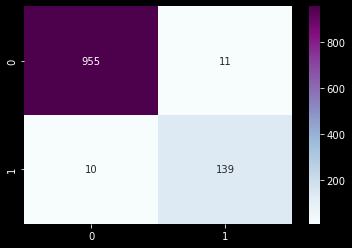

In [29]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, cmap='BuPu', annot=True, fmt='d')

<AxesSubplot:>

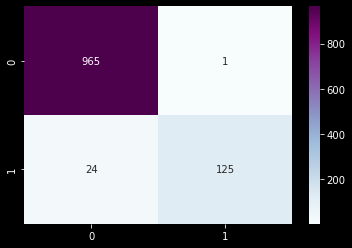

In [32]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_X, y_train)
y_pred_forest = forest_clf.predict(test_X)

cm = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm, cmap='BuPu', fmt='d', annot=True)

In [37]:
print("**Mullti Nominal **")
print("Precision Score: ", precision_score(y_test, y_pred_nb))
print("Recall Score: ", recall_score(y_test, y_pred_nb))
print("f1 Score: ", f1_score(y_test, y_pred_nb))

**Mullti Nominal **
Precision Score:  0.9266666666666666
Recall Score:  0.9328859060402684
f1 Score:  0.9297658862876254


In [36]:
print("**Random Forest Classifier**")
print("Precision Score: ", precision_score(y_test, y_pred_forest))
print("Recall Score: ", recall_score(y_test, y_pred_forest))
print("f1 Score: ", f1_score(y_test, y_pred_forest))


**Random Forest Classifier**
Precision Score:  0.9920634920634921
Recall Score:  0.8389261744966443
f1 Score:  0.9090909090909092


Since the random forest classifier has higher precision in this case we use it in the real world.
Using the random forest classifier implies that most of the spam mails are identified and properly classified but some of the actual mails are classified as spam mails.